# Import Library

In [ ]:
!pip install Sastrawi
!pip install nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')


pd.pandas.set_option('display.max_columns', None)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [ ]:
filename = "Aspek Fasilitas Hotel XYZ.csv"
df = pd.read_csv(filename, encoding = 'latin-1')
df.head()

,nama_hotel,nama_pelanggan,rating,ulasan
0,XYZ,A***n,"8,5","Awalnya penasaran dgn bintangnya 4.9, tapi mmg..."
1,XYZ,Yadi,9,untuk staff hotel ramah2. Hanya masukan saja p...
2,XYZ,E***n,"9,6",Biaya tambahan breakfast untuk anak di bawah 1...
3,XYZ,Si Geboy,10,"hotel na sangad nyaman staff na sngat ramah,, ..."
4,XYZ,H budi k.,"8,4","Sesuai ekspektasi. Kamar-nya bersih, AC-nya di..."


In [ ]:
df.drop(columns = ['nama_hotel', 'nama_pelanggan'], inplace = True)
df.columns = ['rating', 'ulasan']
df.head()

,rating,ulasan
0,"8,5","Awalnya penasaran dgn bintangnya 4.9, tapi mmg..."
1,9,untuk staff hotel ramah2. Hanya masukan saja p...
2,"9,6",Biaya tambahan breakfast untuk anak di bawah 1...
3,10,"hotel na sangad nyaman staff na sngat ramah,, ..."
4,"8,4","Sesuai ekspektasi. Kamar-nya bersih, AC-nya di..."


# Preprocessing Data

### Cleaning the text

In [ ]:
import string
import re

In [ ]:
def clean_text(text):
    return re.sub('[^a-zA-Z]', ' ', text).lower()
df['clean_text'] = df['ulasan'].apply(lambda x: clean_text(x))

## Menambahkan fitur tambahan - panjang dan persentase tanda baca dalam teks

In [ ]:
def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100
df['review_len'] = df['ulasan'].apply(lambda x: len(x) - x.count(" "))
df['punct'] = df['ulasan'].apply(lambda x: count_punct(x))
df.head()

,rating,ulasan,clean_text,review_len,punct
0,"8,5","Awalnya penasaran dgn bintangnya 4.9, tapi mmg...",awalnya penasaran dgn bintangnya tapi mmg...,418,4.3
1,9,untuk staff hotel ramah2. Hanya masukan saja p...,untuk staff hotel ramah hanya masukan saja p...,491,2.6
2,"9,6",Biaya tambahan breakfast untuk anak di bawah 1...,biaya tambahan breakfast untuk anak di bawah ...,72,1.4
3,10,"hotel na sangad nyaman staff na sngat ramah,, ...",hotel na sangad nyaman staff na sngat ramah ...,388,0.5
4,"8,4","Sesuai ekspektasi. Kamar-nya bersih, AC-nya di...",sesuai ekspektasi kamar nya bersih ac nya di...,130,9.2


## Tokenization

In [ ]:
import nltk

nltk.download('all')

from nltk.tokenize import word_tokenize

def tokenize_text(text):
    tokens = nltk.tokenize.word_tokenize(text)
    return tokens

df['tokens'] = df['clean_text'].apply(tokenize_text)

df.head()

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

,rating,ulasan,clean_text,review_len,punct,tokens
0,"8,5","Awalnya penasaran dgn bintangnya 4.9, tapi mmg...",awalnya penasaran dgn bintangnya tapi mmg...,418,4.3,"[awalnya, penasaran, dgn, bintangnya, tapi, mm..."
1,9,untuk staff hotel ramah2. Hanya masukan saja p...,untuk staff hotel ramah hanya masukan saja p...,491,2.6,"[untuk, staff, hotel, ramah, hanya, masukan, s..."
2,"9,6",Biaya tambahan breakfast untuk anak di bawah 1...,biaya tambahan breakfast untuk anak di bawah ...,72,1.4,"[biaya, tambahan, breakfast, untuk, anak, di, ..."
3,10,"hotel na sangad nyaman staff na sngat ramah,, ...",hotel na sangad nyaman staff na sngat ramah ...,388,0.5,"[hotel, na, sangad, nyaman, staff, na, sngat, ..."
4,"8,4","Sesuai ekspektasi. Kamar-nya bersih, AC-nya di...",sesuai ekspektasi kamar nya bersih ac nya di...,130,9.2,"[sesuai, ekspektasi, kamar, nya, bersih, ac, n..."


## Stemming and Removing Stopwords

In [ ]:
#Removing Stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()  # Membuat objek stopword remover

def stopword_text(tokens):
    # Gabungkan tokens menjadi sebuah string, lalu hilangkan stopword
    text = ' '.join(tokens)
    cleaned_text = stopword.remove(text)
    # Kembalikan hasilnya menjadi list token
    cleaned_tokens = cleaned_text.split()
    return cleaned_tokens

# Terapkan fungsi untuk menghapus stopwords
df['stopword'] = df['tokens'].apply(stopword_text)
df.head()


,rating,ulasan,clean_text,review_len,punct,tokens,stopword
0,"8,5","Awalnya penasaran dgn bintangnya 4.9, tapi mmg...",awalnya penasaran dgn bintangnya tapi mmg...,418,4.3,"[awalnya, penasaran, dgn, bintangnya, tapi, mm...","[awalnya, penasaran, dgn, bintangnya, mmg, sem..."
1,9,untuk staff hotel ramah2. Hanya masukan saja p...,untuk staff hotel ramah hanya masukan saja p...,491,2.6,"[untuk, staff, hotel, ramah, hanya, masukan, s...","[staff, hotel, ramah, masukan, pas, check, in,..."
2,"9,6",Biaya tambahan breakfast untuk anak di bawah 1...,biaya tambahan breakfast untuk anak di bawah ...,72,1.4,"[biaya, tambahan, breakfast, untuk, anak, di, ...","[biaya, tambahan, breakfast, anak, bawah, tahu..."
3,10,"hotel na sangad nyaman staff na sngat ramah,, ...",hotel na sangad nyaman staff na sngat ramah ...,388,0.5,"[hotel, na, sangad, nyaman, staff, na, sngat, ...","[hotel, na, sangad, nyaman, staff, na, sngat, ..."
4,"8,4","Sesuai ekspektasi. Kamar-nya bersih, AC-nya di...",sesuai ekspektasi kamar nya bersih ac nya di...,130,9.2,"[sesuai, ekspektasi, kamar, nya, bersih, ac, n...","[sesuai, ekspektasi, kamar, nya, bersih, ac, n..."


In [ ]:
# Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming
def stemming_text(tokens):
    # Lakukan stemming pada setiap token dan gabungkan kembali dengan spasi
    return ' '.join([stemmer.stem(token) for token in tokens])

# Menerapkan fungsi stemming
df['ulasan_stemming'] = df['stopword'].apply(stemming_text)
df.head()

,rating,ulasan,clean_text,review_len,punct,tokens,stopword,ulasan_stemming
0,"8,5","Awalnya penasaran dgn bintangnya 4.9, tapi mmg...",awalnya penasaran dgn bintangnya tapi mmg...,418,4.3,"[awalnya, penasaran, dgn, bintangnya, tapi, mm...","[awalnya, penasaran, dgn, bintangnya, mmg, sem...",awal penasaran dgn bintang mmg semua serviceny...
1,9,untuk staff hotel ramah2. Hanya masukan saja p...,untuk staff hotel ramah hanya masukan saja p...,491,2.6,"[untuk, staff, hotel, ramah, hanya, masukan, s...","[staff, hotel, ramah, masukan, pas, check, in,...",staff hotel ramah masuk pas check in padahal t...
2,"9,6",Biaya tambahan breakfast untuk anak di bawah 1...,biaya tambahan breakfast untuk anak di bawah ...,72,1.4,"[biaya, tambahan, breakfast, untuk, anak, di, ...","[biaya, tambahan, breakfast, anak, bawah, tahu...",biaya tambah breakfast anak bawah tahun baik t...
3,10,"hotel na sangad nyaman staff na sngat ramah,, ...",hotel na sangad nyaman staff na sngat ramah ...,388,0.5,"[hotel, na, sangad, nyaman, staff, na, sngat, ...","[hotel, na, sangad, nyaman, staff, na, sngat, ...",hotel na sangad nyaman staff na sngat ramah ka...
4,"8,4","Sesuai ekspektasi. Kamar-nya bersih, AC-nya di...",sesuai ekspektasi kamar nya bersih ac nya di...,130,9.2,"[sesuai, ekspektasi, kamar, nya, bersih, ac, n...","[sesuai, ekspektasi, kamar, nya, bersih, ac, n...",sesuai ekspektasi kamar nya bersih ac nya ding...


In [ ]:
# 1. Baca kamus lexicon positif dan negatif dengan bobotnya
df_positive = pd.read_csv("positive.tsv", sep="\t", header=None, names=["word", "weight"])
df_negative = pd.read_csv("negative.tsv", sep="\t", header=None, names=["word", "weight"])

# Lewati baris pertama (header) saat membuat kamus
lexicon_positive = dict(zip(df_positive["word"][1:], df_positive["weight"][1:].astype(int)))
lexicon_negative = dict(zip(df_negative["word"][1:], df_negative["weight"][1:].astype(int)))

# 2. Fungsi Menentukan Sentimen dengan Bobot
def determine_sentiment(text):
    score = 0
    words = text.split()  # Memecah teks menjadi kata-kata

    for word in words:
        if word in lexicon_positive:
            score += lexicon_positive[word]  # Tambahkan bobot positif
        elif word in lexicon_negative:
            score += lexicon_negative[word]  # Tambahkan bobot negatif

    # 3. Menentukan Label Sentimen Positif & Negatif
    if score > 0:
        return "1"  # Positif
    elif score < 0:
        return "0"  # Negatif
    else:
        return None  # Tidak ada label jika skor 0

# 4. Terapkan ke DataFrame Ulasan
df['label'] = df['ulasan_stemming'].apply(determine_sentiment)

# Menampilkan hasil dengan label yang telah ditentukan
df.head()

,rating,ulasan,clean_text,review_len,punct,tokens,stopword,ulasan_stemming,label
0,"8,5","Awalnya penasaran dgn bintangnya 4.9, tapi mmg...",awalnya penasaran dgn bintangnya tapi mmg...,418,4.3,"[awalnya, penasaran, dgn, bintangnya, tapi, mm...","[awalnya, penasaran, dgn, bintangnya, mmg, sem...",awal penasaran dgn bintang mmg semua serviceny...,1
1,9,untuk staff hotel ramah2. Hanya masukan saja p...,untuk staff hotel ramah hanya masukan saja p...,491,2.6,"[untuk, staff, hotel, ramah, hanya, masukan, s...","[staff, hotel, ramah, masukan, pas, check, in,...",staff hotel ramah masuk pas check in padahal t...,1
2,"9,6",Biaya tambahan breakfast untuk anak di bawah 1...,biaya tambahan breakfast untuk anak di bawah ...,72,1.4,"[biaya, tambahan, breakfast, untuk, anak, di, ...","[biaya, tambahan, breakfast, anak, bawah, tahu...",biaya tambah breakfast anak bawah tahun baik t...,1
3,10,"hotel na sangad nyaman staff na sngat ramah,, ...",hotel na sangad nyaman staff na sngat ramah ...,388,0.5,"[hotel, na, sangad, nyaman, staff, na, sngat, ...","[hotel, na, sangad, nyaman, staff, na, sngat, ...",hotel na sangad nyaman staff na sngat ramah ka...,1
4,"8,4","Sesuai ekspektasi. Kamar-nya bersih, AC-nya di...",sesuai ekspektasi kamar nya bersih ac nya di...,130,9.2,"[sesuai, ekspektasi, kamar, nya, bersih, ac, n...","[sesuai, ekspektasi, kamar, nya, bersih, ac, n...",sesuai ekspektasi kamar nya bersih ac nya ding...,1


# Exploratory Data Analysis (EDA)

Number of null in rating: 0
Number of null in ulasan: 0
Number of null in label: 17
Number of null in rating after handling: 0
Number of null in ulasan after handling: 0
Number of null in label after handling: 0


<Axes: xlabel='label', ylabel='count'>

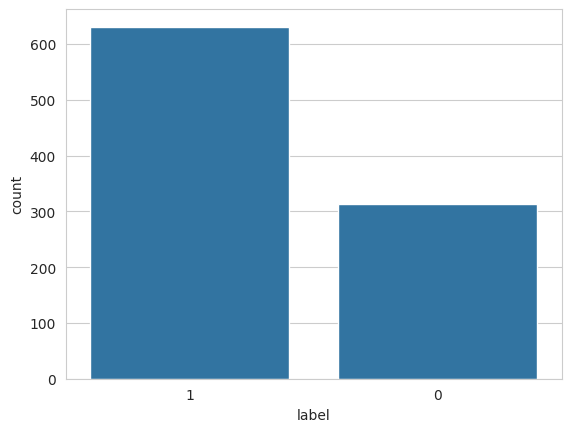

In [ ]:
# Menampilkan jumlah nilai kosong (null) di setiap kolom
print(f"Number of null in rating: { df['rating'].isnull().sum() }")
print(f"Number of null in ulasan: { df['ulasan'].isnull().sum() }")
print(f"Number of null in label: { df['label'].isnull().sum() }")

# Menghapus baris yang memiliki nilai kosong di kolom 'label'
df = df.dropna(subset=['label'])

# Menampilkan jumlah nilai kosong setelah penghapusan
print(f"Number of null in rating after handling: { df['rating'].isnull().sum() }")
print(f"Number of null in ulasan after handling: { df['ulasan'].isnull().sum() }")
print(f"Number of null in label after handling: { df['label'].isnull().sum() }")

# Visualisasi distribusi label setelah penanganan nilai kosong
sns.countplot(x='label', data=df)


label positif (1) = 631 rows
label negatif (0) = 314 rows


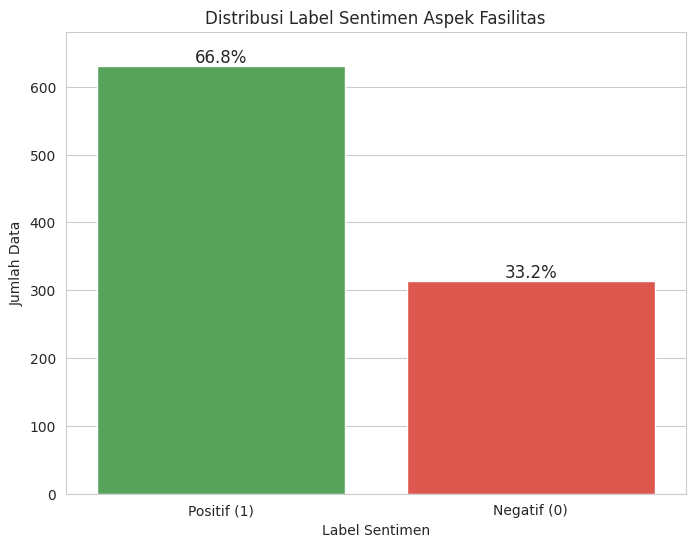

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung total data
total_data = len(df)

print(f"label positif (1) = {len(df[df['label']=='1'])} rows")
print(f"label negatif (0) = {len(df[df['label']=='0'])} rows")

# Hitung jumlah per label
label_counts = df['label'].value_counts()

# Hitung persentase
percentages = (label_counts / total_data) * 100

# Siapkan data
labels = ['Positif (1)', 'Negatif (0)']
colors = ['#4CAF50', '#F44336']
values = [label_counts['1'], label_counts['0']]
percent_labels = [percentages['1'], percentages['0']]

# Plot
plt.figure(figsize=(8, 6))
bars = sns.barplot(x=labels, y=values, palette=colors)

# Tambahkan persentase di atas bar
for i, (count, percent) in enumerate(zip(values, percent_labels)):
    plt.text(i, count + 5, f"{percent:.1f}%", ha='center', fontsize=12)

plt.title('Distribusi Label Sentimen Aspek Fasilitas')
plt.xlabel('Label Sentimen')
plt.ylabel('Jumlah Data')
plt.ylim(0, max(values) + 50)
plt.show()


# Visualizating Wordcloud

In [ ]:
from wordcloud import WordCloud

In [ ]:

df_positive = df[df['label'] == '1']
df_negative = df[df['label'] == '0']

# Convert to list
negative_list = df_negative['ulasan_stemming'].tolist()
positive_list = df_positive['ulasan_stemming'].tolist()



filtered_negative = ("").join(str(negative_list))  # Ubah list menjadi string
filtered_negative = filtered_negative.lower()

filtered_positive = ("").join(str(positive_list))  # Ubah list menjadi string
filtered_positive = filtered_positive.lower()



## Word Cloud: Ulasan Positif

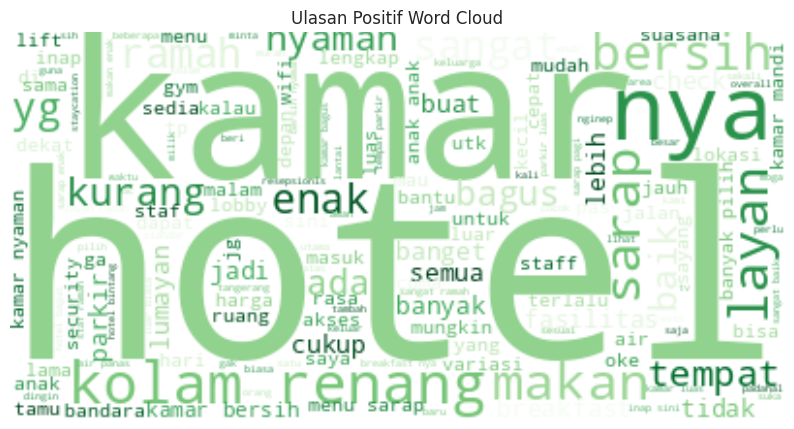

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Greens").generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Ulasan Positif Word Cloud")
plt.show()

## Word Colud: Ulasan Negatif

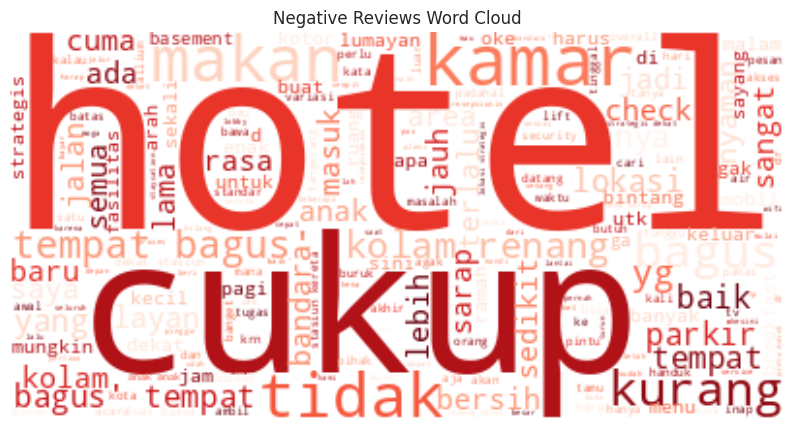

In [ ]:
wordcloud = WordCloud(max_font_size = 160, margin=0, background_color = "white", colormap="Reds").generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title("Negative Reviews Word Cloud")
plt.show()

In [ ]:
X = df[['ulasan_stemming', 'review_len', 'punct']]
y = df['label']
print(X.shape)
print(y.shape)

(945, 3)
(945,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 16)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(756, 3)
(189, 3)
(756,)
(189,)


           Kata  Rata-rata TF-IDF
71        bagus          0.069671
1125     tempat          0.069210
480       kamar          0.051544
394       hotel          0.048943
133      bersih          0.041725
948       sarap          0.039637
743         nya          0.038175
550       kolam          0.034804
789      parkir          0.034750
305        enak          0.034658
892      renang          0.032739
745      nyaman          0.032350
76         baik          0.032154
943      sangat          0.031177
864       ramah          0.030229
597       layan          0.029768
641       makan          0.029630
229       cukup          0.027818
167   breakfast          0.026524
576      kurang          0.025140


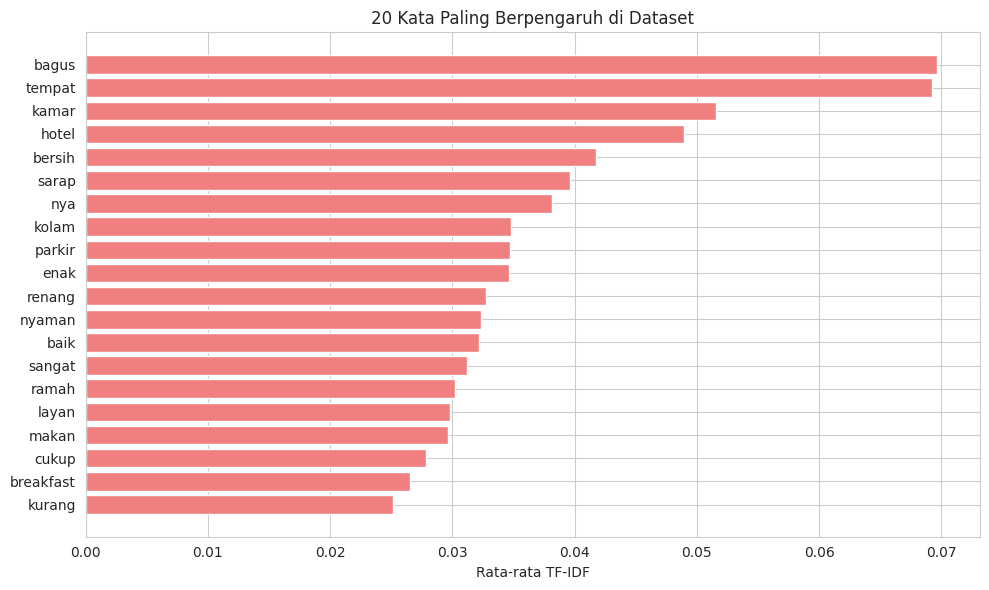

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_df=0.5, min_df=2)  # abaikan istilah yg muncul >50% dokumen dan <2 dokumen
tfidf_train = tfidf.fit_transform(X_train['ulasan_stemming'])
tfidf_test = tfidf.transform(X_test['ulasan_stemming'])

# Gabungkan TF-IDF dengan fitur lain
X_train_vect = pd.concat([
    X_train[['review_len', 'punct']].reset_index(drop=True),
    pd.DataFrame(tfidf_train.toarray())
], axis=1)

X_test_vect = pd.concat([
    X_test[['review_len', 'punct']].reset_index(drop=True),
    pd.DataFrame(tfidf_test.toarray())
], axis=1)

# --- Analisis Kata Paling Berpengaruh berdasarkan TF-IDF Rata-rata ---

# Ambil daftar kata/fitur dari TF-IDF
feature_names = tfidf.get_feature_names_out()

# Hitung rata-rata skor TF-IDF untuk setiap kata
avg_tfidf_scores = tfidf_train.toarray().mean(axis=0)

# Buat DataFrame untuk kata dan skor rata-ratanya
tfidf_scores_df = pd.DataFrame({
    'Kata': feature_names,
    'Rata-rata TF-IDF': avg_tfidf_scores
})

# Urutkan dari yang tertinggi
tfidf_scores_df = tfidf_scores_df.sort_values(by='Rata-rata TF-IDF', ascending=False)

# Tampilkan 20 kata teratas
print(tfidf_scores_df.head(20))

# --- Visualisasi 20 Kata Paling Berpengaruh ---
top_words = tfidf_scores_df.head(20)
plt.figure(figsize=(10, 6))
plt.barh(top_words['Kata'], top_words['Rata-rata TF-IDF'], color='lightcoral')
plt.xlabel('Rata-rata TF-IDF')
plt.title('20 Kata Paling Berpengaruh di Dataset')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=16)
# Convert all column names to string type
X_train_vect.columns = X_train_vect.columns.astype(str)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vect, y_train)
# Cek distribusi data sebelum diimplementasikan SMOTE
print("Distribusi sebelum SMOTE:", Counter(y_train))

# Cek distribusi data setelah diimplementasikan SMOTE
print("Distribusi setelah SMOTE:", Counter(y_train_resampled))

Distribusi sebelum SMOTE: Counter({'1': 501, '0': 255})
Distribusi setelah SMOTE: Counter({'1': 501, '0': 501})


In [ ]:
from collections import Counter
print("Distribusi Label Data Training:", Counter(y_train))

Distribusi Label Data Training: Counter({'1': 501, '0': 255})


In [ ]:
from collections import Counter
print("Distribusi Label Data Testing:", Counter(y_test))

Distribusi Label Data Testing: Counter({'1': 130, '0': 59})


# Visualize Confusion Matrix

*   Vectorizer : TF-IDF




In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Support Vector Machine

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        59
           1       0.93      0.95      0.94       130

    accuracy                           0.92       189
   macro avg       0.90      0.90      0.90       189
weighted avg       0.91      0.92      0.91       189



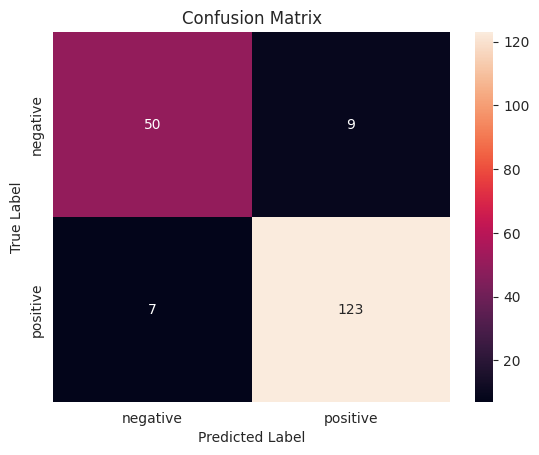

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', C=1)

X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

classifier.fit(X_train_resampled, y_train_resampled)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        59
           1       0.94      0.94      0.94       130

    accuracy                           0.92       189
   macro avg       0.90      0.90      0.90       189
weighted avg       0.92      0.92      0.92       189



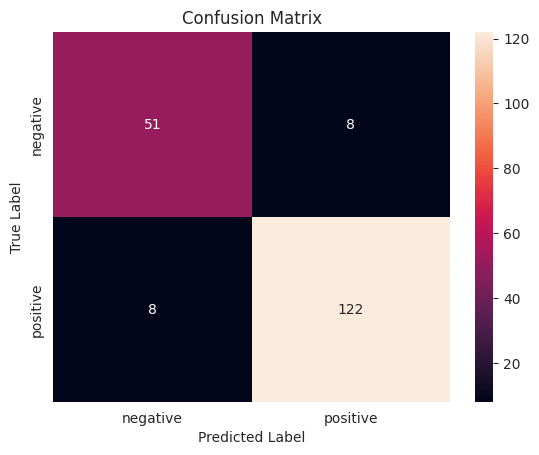

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', C=2)

X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

classifier.fit(X_train_resampled, y_train_resampled)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        59
           1       0.95      0.93      0.94       130

    accuracy                           0.92       189
   macro avg       0.90      0.91      0.90       189
weighted avg       0.92      0.92      0.92       189



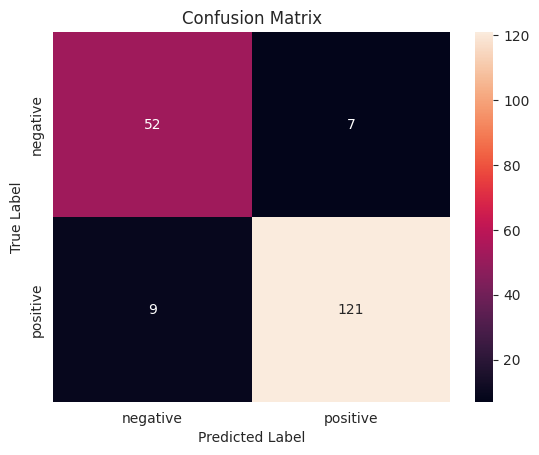

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', C=3)

X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

classifier.fit(X_train_resampled, y_train_resampled)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.86      0.86        59
           1       0.94      0.93      0.93       130

    accuracy                           0.91       189
   macro avg       0.89      0.90      0.90       189
weighted avg       0.91      0.91      0.91       189



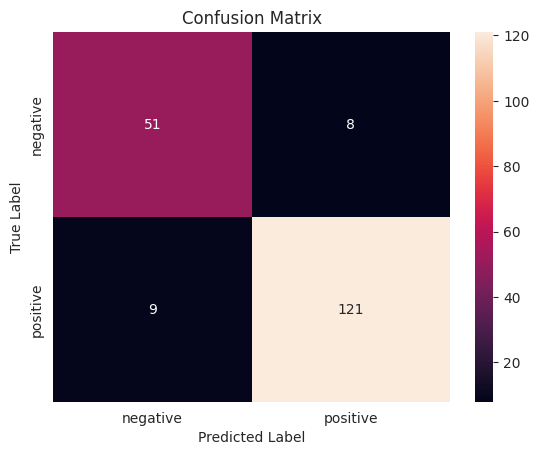

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', C=4)

X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

classifier.fit(X_train_resampled, y_train_resampled)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.86      0.86        59
           1       0.94      0.93      0.93       130

    accuracy                           0.91       189
   macro avg       0.89      0.90      0.90       189
weighted avg       0.91      0.91      0.91       189



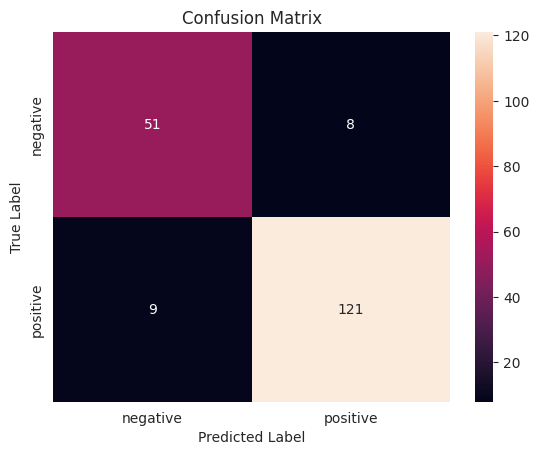

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', C=5)

X_train_vect.columns = X_train_vect.columns.astype(str)
X_test_vect.columns = X_test_vect.columns.astype(str)

classifier.fit(X_train_resampled, y_train_resampled)
svm_pred = classifier.predict(X_test_vect)
# Classification report
print(classification_report(y_test, svm_pred))

# Confusion Matrix
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(confusion_matrix(y_test, svm_pred), index=class_label, columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Performa pada Data Latih (Setelah SMOTE):
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       501
           1       0.98      0.99      0.99       501

    accuracy                           0.99      1002
   macro avg       0.99      0.99      0.99      1002
weighted avg       0.99      0.99      0.99      1002


Performa pada Data Uji:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        59
           1       0.93      0.95      0.94       130

    accuracy                           0.92       189
   macro avg       0.90      0.90      0.90       189
weighted avg       0.91      0.92      0.91       189



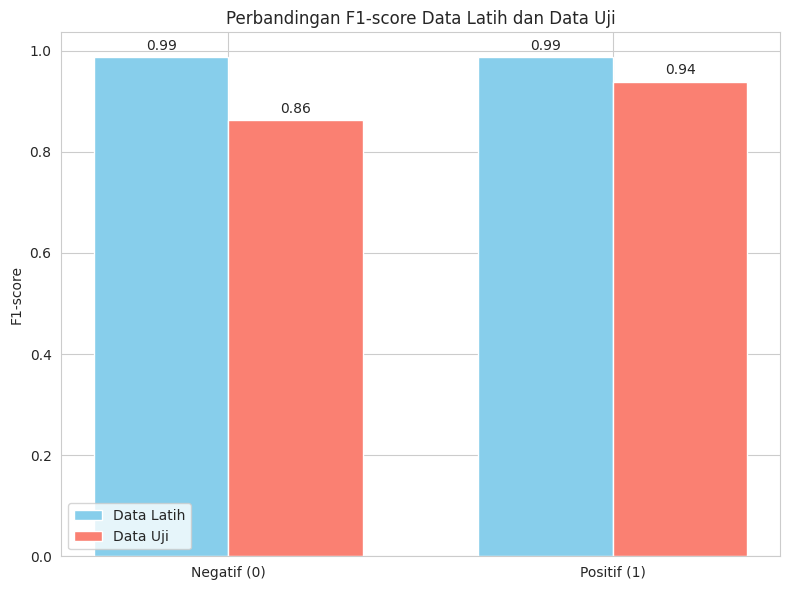


Analisis Perbedaan Performa:
F1-score Negatif (0) - Latih: 0.99, Uji: 0.86
F1-score Positif (1) - Latih: 0.99, Uji: 0.94

Ada perbedaan signifikan antara performa data latih dan data uji.
Ini mungkin mengindikasikan overfitting (jika performa latih jauh lebih tinggi dari uji) atau isu lainnya.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Evaluate the model on the training data
y_train_pred = classifier.predict(X_train_resampled) # Use resampled data for training prediction

print("Performa pada Data Latih (Setelah SMOTE):")
print(classification_report(y_train_resampled, y_train_pred))

print("\nPerforma pada Data Uji:")
print(classification_report(y_test, svm_pred))

# Visualisasi perbandingan F1-score (atau metrik lain) antara data latih dan uji
report_train = classification_report(y_train_resampled, y_train_pred, output_dict=True)
report_test = classification_report(y_test, svm_pred, output_dict=True)

# Ambil F1-score untuk kelas '0' dan '1'
f1_train_0 = report_train['0']['f1-score']
f1_train_1 = report_train['1']['f1-score']
f1_test_0 = report_test['0']['f1-score']
f1_test_1 = report_test['1']['f1-score']

labels = ['Negatif (0)', 'Positif (1)']
train_scores = [f1_train_0, f1_train_1]
test_scores = [f1_test_0, f1_test_1]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, train_scores, width, label='Data Latih', color='skyblue')
rects2 = ax.bar(x + width/2, test_scores, width, label='Data Uji', color='salmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1-score')
ax.set_title('Perbandingan F1-score Data Latih dan Data Uji')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Fungsi untuk menambahkan nilai di atas bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('%.2f' % height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

# Analisis perbedaan performa
print("\nAnalisis Perbedaan Performa:")
print(f"F1-score Negatif (0) - Latih: {f1_train_0:.2f}, Uji: {f1_test_0:.2f}")
print(f"F1-score Positif (1) - Latih: {f1_train_1:.2f}, Uji: {f1_test_1:.2f}")

# Tambahkan komentar atau interpretasi berdasarkan nilai F1-score
if abs(f1_train_0 - f1_test_0) > 0.1 or abs(f1_train_1 - f1_test_1) > 0.1:
    print("\nAda perbedaan signifikan antara performa data latih dan data uji.")
    print("Ini mungkin mengindikasikan overfitting (jika performa latih jauh lebih tinggi dari uji) atau isu lainnya.")
else:
    print("\nPerforma data latih dan data uji relatif serupa.")
    print("Ini mengindikasikan model yang cukup baik dalam generalisasi.")

